## Step 1 | Setup and Initialization

I'll initialize the libraries that will be utilized throughout the project. This generally includes libraries for data manipulation, data visualization, and others based on the specific needs of the project.

In [11]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### Step 1.2 | Loading the Dataset

Load the survey responses into a pandas DataFrame which will facilitate easy manipulation and analysis:

In [12]:
import os

# Change directory
project_dir = r'D:\Documents\projects\SurveyAnalysis\Checkout'
os.chdir(project_dir)

# Check if files exist
survey_file = 'data/processed/1-checkout_survey_responses.csv'

if os.path.exists(survey_file):
    df = pd.read_csv(survey_file)
    print(f"Loaded {survey_file}")
else:
    print(f"File not found: {survey_file}")
    print("Current directory contents:")
    print(os.listdir('.'))


Loaded data/processed/1-checkout_survey_responses.csv


## Step 2 | Summarizing & Exploring Survey Data

When we collect survey data, the first step is to summarize the responses so that we can see what is typical, how much variation there is, and whether there are clear differences between groups. This stage provides a clear picture of the data before moving to more advanced analysis.

### Step 2.1 | Survey Response Overview

In [29]:
## Preliminary analysis to understand the structure and content of the dataset
df.head(10)

,Age_Group,Ease_of_Checkout,Time_Spent_Minutes,Payment_Method
0,25-34,4,5.6,BNPL
1,55-64,2,4.0,BNPL
2,35-44,3,4.8,BNPL
3,35-44,5,3.6,Card
4,18-24,4,4.4,Card
5,18-24,1,3.8,PayPal
6,18-24,2,4.1,BNPL
7,45-54,4,4.7,PayPal
8,35-44,1,3.0,PayPal
9,35-44,3,6.5,Card


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age_Group           200 non-null    object 
 1   Ease_of_Checkout    200 non-null    int64  
 2   Time_Spent_Minutes  200 non-null    float64
 3   Payment_Method      200 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.4+ KB


In [36]:
df['Ease_of_Checkout'] = df['Ease_of_Checkout'].astype('int64')

In [31]:
print("Shape of complete survey data : ", df.shape)

Shape of complete survey data :  (200, 4)


Inferences:

The survey responses dataset consists of 200 entries and 4 columns. Here is a brief overview of each column:

- Age_Group: This is an object data type column that contains the age range of each respondent. Each group represent common age ranges. 

- Ease_of_Checkout: 

- Time_Spent_Minutes: 

- Payment_Method:



### Step 2.2 | Summary Statistics

Generate summary statistics to gain initial insights into the data distribution.

#### Step 2.2.1 Numeric Data

1. Measures of Central Tendency

In [59]:
#Summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ease_of_Checkout,200.0,3.6800,1.159449,1.0,3.0,4.0,4.000,5.0
Time_Spent_Minutes,200.0,3.9945,1.185049,1.2,3.1,4.0,4.725,7.7


2. Measures of Variability (Spread)

In [37]:
#Range for numerical variables
data_range = df.describe().T[['min', 'max']]
range_ease = df["Ease_of_Checkout"].max() - df["Ease_of_Checkout"].min()
range_time = df["Time_Spent_Minutes"].max() - df["Time_Spent_Minutes"].min()
print("Data Range for Numerical Variables:\n", data_range)
print("Range for Ease of Checkout:", range_ease)
print("Range for Time Spent (in minutes):", range_time)

Data Range for Numerical Variables:
                     min  max
Ease_of_Checkout    1.0  5.0
Time_Spent_Minutes  1.2  7.7
Range for Ease of Checkout: 4
Range for Time Spent (in minutes): 6.5


In [ ]:
# Interquartile Range (IQR) for numerical variables
Q1_ease = df["Ease_of_Checkout"].quantile(0.25)
Q3_ease = df["Ease_of_Checkout"].quantile(0.75)
Q1_time = df["Time_Spent_Minutes"].quantile(0.25)
Q3_time = df["Time_Spent_Minutes"].quantile(0.75)
iqr_ease = Q3_ease - Q1_ease
iqr_time = Q3_time - Q1_time
print("Interquartile Range (IQR) for Ease of Checkout:", iqr_ease)
print("Interquartile Range (IQR) for Time Spent (in minutes):", iqr_time)

Interquartile Range (IQR) for Ease of Checkout: 1.0
Interquartile Range (IQR) for Time Spent (in minutes): 1.6249999999999996


In [ ]:
# Mean Absolute Deviation for numerical variables
# Compute MAD manually and coerce non-numeric values if present
ease_series = pd.to_numeric(df["Ease_of_Checkout"], errors='coerce')
time_series = pd.to_numeric(df["Time_Spent_Minutes"], errors='coerce')
mad_ease = (ease_series - ease_series.mean()).abs().mean()
mad_time = (time_series - time_series.mean()).abs().mean()
print("Mean Absolute Deviation for Ease of Checkout:", mad_ease)
print("Mean Absolute Deviation for Time Spent (in minutes):", mad_time)

Mean Absolute Deviation for Ease of Checkout: 0.9220000000000002
Mean Absolute Deviation for Time Spent (in minutes): 0.9445549999999998


In [ ]:
# Variance
variance_ease = df["Ease_of_Checkout"].var()
variance_time = df["Time_Spent_Minutes"].var()  
print("Variance for Ease of Checkout:", variance_ease)
print("Variance for Time Spent (in minutes):", variance_time)

Variance for Ease of Checkout: 1.344321608040201
Variance for Time Spent (in minutes): 1.404341457286432


Inferences:

- <b>Ease of Checkout</b>:

     - The average ease of checkout score is a 3.68.
     - The middle 50% of respondents scored between 3 and 4  (tight cluster).
     - The ease of checkout score is based on a 1 to 5 scale.
     - MAD = 0.92, Std = 1.16, Variance = 1.34 → Variability is low to moderate. Responses don’t deviate more than ~1 point from the mean.

        -  <b>Interpretation:

            Most respondents found the checkout process fairly easy (average rating 3.7/5). Ratings are consistent, with most clustered around 3–4. A minority rated it very difficult (1) or very easy (5), but the majority view leans toward “easy.”</b>
    

- <b>Time Spent in Minutes</b>:

    - the average time spent (in minutes) is approximately 3.99 and the middle 50% spent 4 minutes.
    - the average time spent shows a spread of 6.5 minutes, with a range from 1.2 minutes (72 seconds) to 7.7 minutes (462 seconds).
    - There's moderate variability based on MAD = 0.94, Std = 1.19, Variance = 1.40. Most people were within ±1 minute of the mean, though a few took as long as 7+ minutes. 

        - <b>Interpretation:

             On average, respondents spent ~4 minutes at checkout. The majority were tightly clustered around this value (3–5 minutes). A few outliers spent significantly longer (7+ minutes), stretching the range.</b>

3. Shape of the Distribution: Skewness and Kurtosis

In [ ]:

skewness_ease = df["Ease_of_Checkout"].skew()
kurtosis_ease = df["Ease_of_Checkout"].kurtosis()   
skewness_time = df["Time_Spent_Minutes"].skew()
kurtosis_time = df["Time_Spent_Minutes"].kurtosis()
print("Skewness for Ease of Checkout:", skewness_ease)
print("Kurtosis for Ease of Checkout:", kurtosis_ease)  
print("Skewness for Time Spent (in minutes):", skewness_time)
print("Kurtosis for Time Spent (in minutes):", kurtosis_time)

Skewness for Ease of Checkout: -0.8747963156437871
Kurtosis for Ease of Checkout: 0.03115942810030603
Skewness for Time Spent (in minutes): 0.27294074359934006
Kurtosis for Time Spent (in minutes): -0.1834005429307468


Inferences:

1. Ease of Checkout  

    - Skewness = -0.875

        - Moderate negative skew → most people rated checkout as fairly easy (3–5), but a small group gave very low scores (1–2).

        - Pulls the “tail” to the left.

    - Kurtosis = 0.03

        - Very close to 0 → distribution is similar to a normal bell curve in terms of tails and peakedness.

        - No unusual concentration of extreme outliers.

    <b>Interpretation:

    Ratings are fairly consistent, leaning toward easy checkout, with just a handful of respondents who rated it very difficult. The shape is close to normal, so the data isn’t overly spiky or flat.</b>
<br></br>

2. Time Spent (minutes)

    - Skewness = 0.273 

        - Slight positive skew → most people spend ~4 minutes, but a few take longer (closer to 7+ minutes).

        - Distribution is nearly symmetric overall.

    - Kurtosis = -0.183

        - Slightly below 0 → tails are a bit lighter than normal (fewer extreme outliers).

        - Data is somewhat “flatter” than a perfect bell curve.

    <b> Interpretation:

    Checkout time is centered tightly around 4 minutes, with only a small number of longer outliers. The distribution is smooth and fairly flat, without heavy tails.

#### Step 2.2.2 Categorical Data

In [32]:
# Summary statistics for categorical variables
df.describe(include='object').T


,count,unique,top,freq
Age_Group,200,5,25-34,56
Payment_Method,200,3,Card,98


Inferences:

- <b>Age Group</b>:
    - There are 5 unique age_groups, representing different audiences.
    - The most frequent age group audience is 25-34, representing 28% of respondents.

- <b>Payment_Method</b>:
    - There are 3 unique payment methods: Buy Now Pay Later (BNPL), PayPal, and Card.
    - The most frequent payment method is credit card.

    

#### Step 2.2.3 Descriptive Statistics by Age Group

Often you will want to break down your descriptive statistics down by group (demographic group, condition, etc.). This helps you see if patterns differ across the groups:

- Compare means, medians, variability within each group.
- Examine whether the shape (skewness) differs by group.

In [41]:
# Group the dataframe by Age_Group
df.groupby('Age_Group')[df.select_dtypes(include='number').columns].describe().T

Age_Group                     18-24      25-34      35-44      45-54  \
Ease_of_Checkout   count  46.000000  56.000000  47.000000  32.000000   
                   mean    3.543478   3.714286   3.723404   3.968750   
                   std     1.277263   1.123538   1.228327   0.860771   
                   min     1.000000   1.000000   1.000000   2.000000   
                   25%     3.000000   3.000000   3.000000   3.750000   
                   50%     4.000000   4.000000   4.000000   4.000000   
                   75%     4.000000   4.000000   5.000000   5.000000   
                   max     5.000000   5.000000   5.000000   5.000000   
Time_Spent_Minutes count  46.000000  56.000000  47.000000  32.000000   
                   mean    3.936957   4.042857   4.146809   4.006250   
                   std     1.346495   1.230795   1.096804   1.180469   
                   min     1.500000   1.900000   2.100000   1.200000   
                   25%     3.000000   3.000000   3.300000   3.300000   
                   50%     4.050000   3.950000   4.000000   3.950000   
                   75%     4.675000   4.800000   4.900000   4.850000   
                   max     7.700000   6.600000   6.500000   6.300000   

Age_Group                     55-64  
Ease_of_Checkout   count  19.000000  
                   mean    3.315789  
                   std     1.204281  
                   min     1.000000  
                   25%     2.500000  
                   50%     4.000000  
                   75%     4.000000  
                   max     5.000000  
Time_Spent_Minutes count  19.000000  
                   mean    3.594737  
                   std     0.803101  
                   min     2.300000  
                   25%     3.100000  
                   50%     3.400000  
                   75%     4.050000  
                   max     5.400000

### Z-Score across the whole dataset

In [50]:
# Select numeric columns
num_cols = df.select_dtypes(include='number').columns

# Compute z-scores for each numeric column
z_scores = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()

# Add back to dataframe with suffix
df_z = df.copy()
df_z[[col + '_z' for col in num_cols]] = z_scores

print(df_z)


    Age_Group  Ease_of_Checkout  Time_Spent_Minutes Payment_Method  \
0       25-34                 4                 5.6           BNPL   
1       55-64                 2                 4.0           BNPL   
2       35-44                 3                 4.8           BNPL   
3       35-44                 5                 3.6           Card   
4       18-24                 4                 4.4           Card   
..        ...               ...                 ...            ...   
195     25-34                 5                 3.0           Card   
196     35-44                 5                 4.3           Card   
197     45-54                 4                 3.9           Card   
198     45-54                 5                 3.7         PayPal   
199     45-54                 5                 2.9         PayPal   

     Ease_of_Checkout_z  Time_Spent_Minutes_z  
0              0.275993              1.354796  
1             -1.448964              0.004641  
2             -

##Z-score across age group

In [60]:
# Select numeric columns
num_cols = ['Ease_of_Checkout', 'Time_Spent_Minutes']

# Group by Age_Group and calculate z-scores
df_z = df.copy()
df_z[[col + '_z' for col in num_cols]] = df.groupby('Age_Group')[num_cols].transform(
    lambda x: (x - x.mean()) / x.std()
)
print(df_z)

    Age_Group  Ease_of_Checkout  Time_Spent_Minutes Payment_Method  \
0       25-34                 4                 5.6           BNPL   
1       55-64                 2                 4.0           BNPL   
2       35-44                 3                 4.8           BNPL   
3       35-44                 5                 3.6           Card   
4       18-24                 4                 4.4           Card   
..        ...               ...                 ...            ...   
195     25-34                 5                 3.0           Card   
196     35-44                 5                 4.3           Card   
197     45-54                 4                 3.9           Card   
198     45-54                 5                 3.7         PayPal   
199     45-54                 5                 2.9         PayPal   

     Ease_of_Checkout_z  Time_Spent_Minutes_z  
0              0.254299              1.265152  
1             -1.092594              0.504623  
2             -

In [58]:
# Create function to build descriptive statistics block
def create_descriptive_stats(df, var, group_var='Age_Group'):
    if var in ['Ease_of_Checkout', 'Time_Spent_Minutes']:
        # For numeric variables
        g = df.groupby(group_var)[var]
        stats = pd.DataFrame({
            'Variable': var,
            'Age_Group': g.groups.keys(),
            'N': g.count(),
            'Missing': g.apply(lambda x: x.isna().sum()),
            'Mean': g.mean(),
            'Median': g.median(),
            'SD': g.std()
        })
    else:
        # For Payment_Method (categorical)
        crosstab = pd.crosstab(df[group_var], df[var], margins=False)
        stats_list = []
        for age_group in crosstab.index:
            row_data = {
                'Variable': 'Payment_Method',
                'Age_Group': age_group,
                'N': crosstab.loc[age_group].sum(),
                'Missing': df[df[group_var] == age_group][var].isna().sum(),
                'Mean': None,
                'Median': None,
                'SD': None
            }
            stats_list.append(row_data)
        stats = pd.DataFrame(stats_list)
    
    return stats

# Create individual blocks
ease_stats = create_descriptive_stats(df, 'Ease_of_Checkout')
time_stats = create_descriptive_stats(df, 'Time_Spent_Minutes')
payment_stats = create_descriptive_stats(df, 'Payment_Method')

# Combine all statistics
final_stats = pd.concat([ease_stats, time_stats, payment_stats], ignore_index=True)

# Sort by Variable (to maintain specific order) and Age_Group
final_stats = final_stats.sort_values(['Variable', 'Age_Group'])

# Display the results
print("\nDescriptive Statistics by Age Group:")
print(final_stats.to_string(index=False))

# If you want to save to CSV
# final_stats.to_csv('descriptive_statistics.csv', index=False)


Descriptive Statistics by Age Group:
          Variable Age_Group  N  Missing     Mean  Median       SD
  Ease_of_Checkout     18-24 46        0 3.543478    4.00 1.277263
  Ease_of_Checkout     25-34 56        0 3.714286    4.00 1.123538
  Ease_of_Checkout     35-44 47        0 3.723404    4.00 1.228327
  Ease_of_Checkout     45-54 32        0 3.968750    4.00 0.860771
  Ease_of_Checkout     55-64 19        0 3.315789    4.00 1.204281
    Payment_Method     18-24 46        0      NaN     NaN      NaN
    Payment_Method     25-34 56        0      NaN     NaN      NaN
    Payment_Method     35-44 47        0      NaN     NaN      NaN
    Payment_Method     45-54 32        0      NaN     NaN      NaN
    Payment_Method     55-64 19        0      NaN     NaN      NaN
Time_Spent_Minutes     18-24 46        0 3.936957    4.05 1.346495
Time_Spent_Minutes     25-34 56        0 4.042857    3.95 1.230795
Time_Spent_Minutes     35-44 47        0 4.146809    4.00 1.096804
Time_Spent_Minutes     4

C:\Users\Roo\AppData\Local\Temp\ipykernel_17800\2159423997.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_stats = pd.concat([ease_stats, time_stats, payment_stats], ignore_index=True)


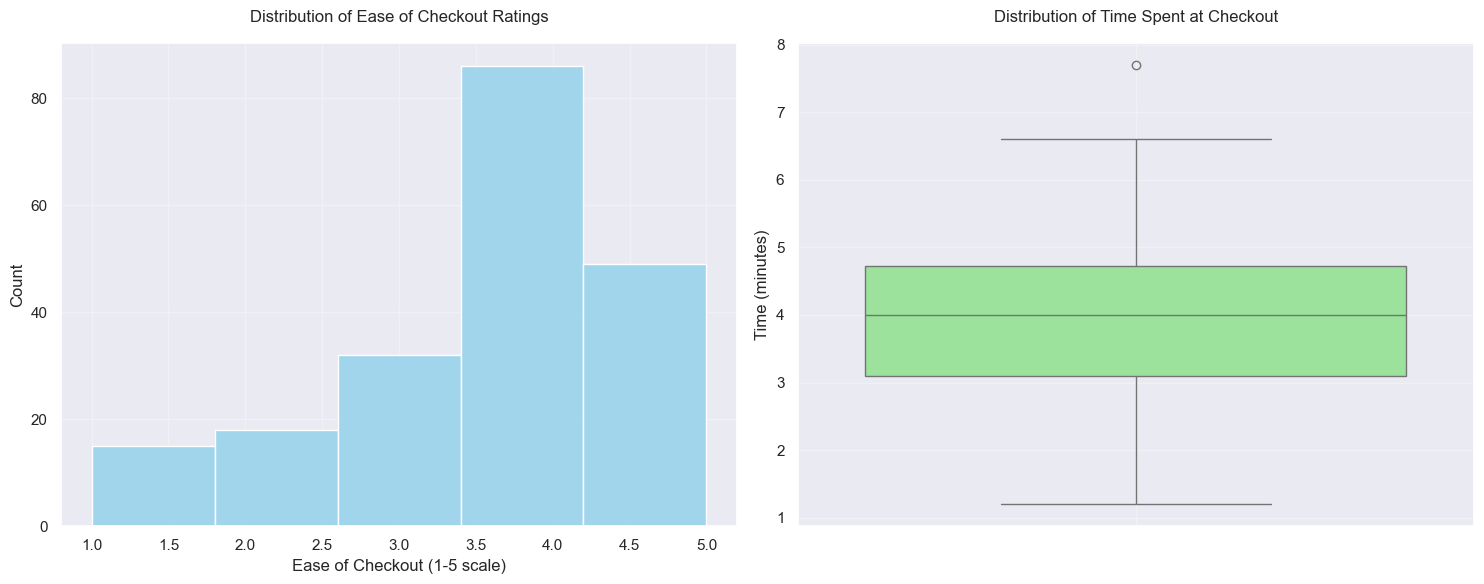

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the style (using a built-in matplotlib style)
plt.style.use('default')  # or try 'ggplot', 'fivethirtyeight', etc.
sns.set_theme()  # Apply seaborn's default theme

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Ease of Checkout
sns.histplot(data=df, x='Ease_of_Checkout', bins=5, ax=ax1, color='skyblue')
ax1.set_title('Distribution of Ease of Checkout Ratings', pad=15)
ax1.set_xlabel('Ease of Checkout (1-5 scale)')
ax1.set_ylabel('Count')
ax1.grid(True, alpha=0.3)

# Boxplot for Time Spent
sns.boxplot(y=df['Time_Spent_Minutes'], ax=ax2, color='lightgreen')
ax2.set_title('Distribution of Time Spent at Checkout', pad=15)
ax2.set_ylabel('Time (minutes)')
ax2.grid(True, alpha=0.3)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

# Optional: Save the figure
# plt.savefig('checkout_distributions.png', dpi=300, bbox_inches='tight')

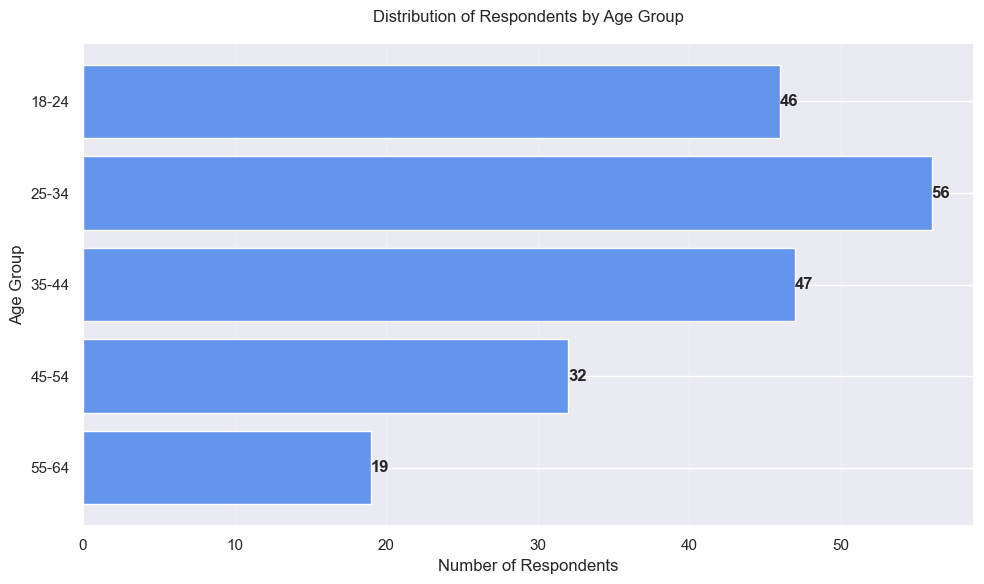

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate age group counts
age_counts = df['Age_Group'].value_counts().sort_index(ascending=False)

# Create figure and axis
plt.figure(figsize=(10, 6))

# Create horizontal bar chart
bars = plt.barh(y=age_counts.index, width=age_counts.values, color='cornflowerblue')

# Customize the plot
plt.title('Distribution of Respondents by Age Group', pad=15)
plt.xlabel('Number of Respondents')
plt.ylabel('Age Group')

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2,
            f'{int(width)}',
            ha='left', va='center', fontweight='bold')
    
# Add grid for better readability
plt.grid(True, axis='x', alpha=0.3)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()